# FDA  Submission

**Your Name:** Brijesh Modasara

**Name of your Device:** Pneu-Net

## Algorithm Description 

### 1. General Information

**Intended Use Statement:** Assisting a radiologist in classifying a given chest x-ray for the presence or absence of pneumonia.

**Indications for Use:** Indicated for use in screening Pneumonia in males and females of ages 1-120 years having one or more combination of following diseases: atelectasis, heart enlargement, standardization, edema, effusion, emphysema, fibrosis, hernia, infiltration, mass, Creed, pleura thickening and pneumothorax.

**Device Limitations:**
1. Requires Nvidia GPU for fast workflow reprioritization to avoid latency issues
2. The image intensity distribution of pneumonia like very similar to that of Infiltration and effusion which can confuse our model and lead to false results.

**Clinical Impact of Performance:** This is a high-recall algorithm. So that, when a high recall test returns a negative result, we can be confident that the result is truly negative since a high recall test has low false negatives. This is specially useful in worklist prioritization where we want to make sure that people without the disease are being de-prioritized.

### 2. Algorithm Design and Function
The flowchart
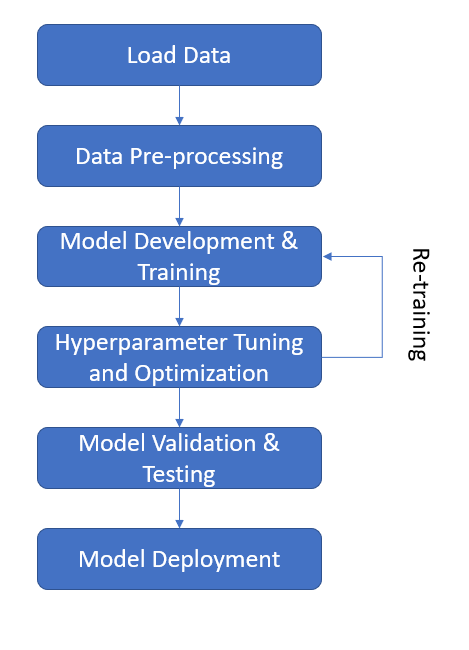

**DICOM Checking Steps:** The DICOM metadata is checked for following:
1. Modality = DX
2. Body Part Examined = Chest
3. Patient Position in [PA, AP]

**Preprocessing Steps:** All the images have been normalized in the range of [0, 1] and resized to (224, 224, 3). Moreover, during the training, image augmentation was applied to account for rotation, horizontal flip, sheer, horizontal and vertical image translation and image focus.

**CNN Architecture:**
The CNN model involves taking a trained vgg model and adding a couple of layers at the for the given use case.
The VGG model
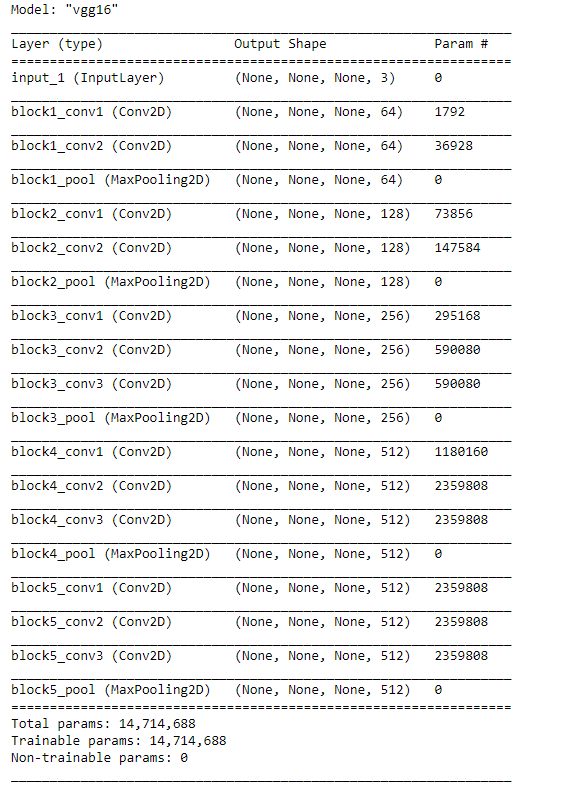
The final model for Pneu-Net
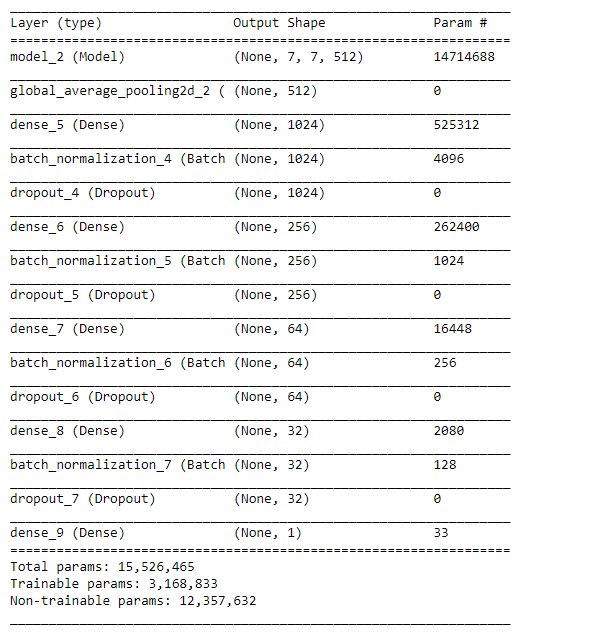

### 3. Algorithm Training

**Parameters:**
* Types of augmentation used during training
    1. Horizontal Flip: Boolean which randomly flip inputs horizontally.
    2. Random Rotation upto 20 degrees
    3. Random width shift of (+/-) 10%
    4. Random height shift of (+/-) 10%
    5. Random shear range of (+/-) 10%
    6. Random zoom range of (+/-) 120%
* Batch size: 32
* Epochs: 23
* Optimizer learning rate: 2e-3
* Layers of pre-existing architecture that were frozen:  First 17 layers of VGG pre-trained network
* Layers of pre-existing architecture that were fine-tuned: Last convolutional layer
* Layers added to pre-existing architecture: 

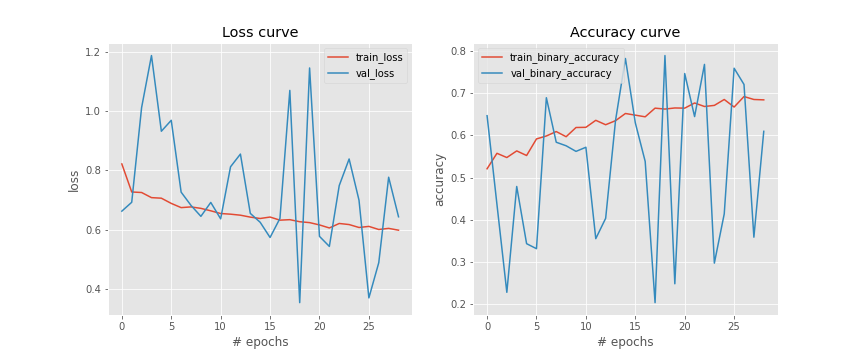
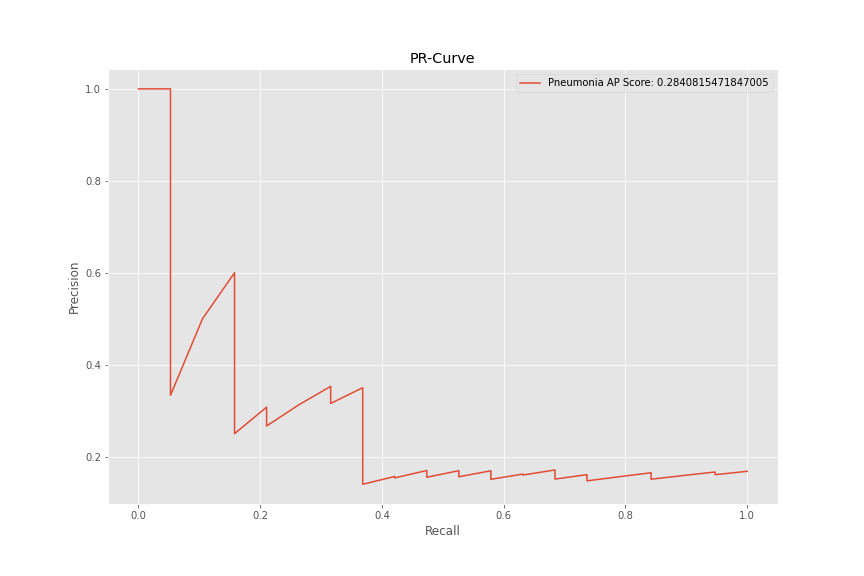
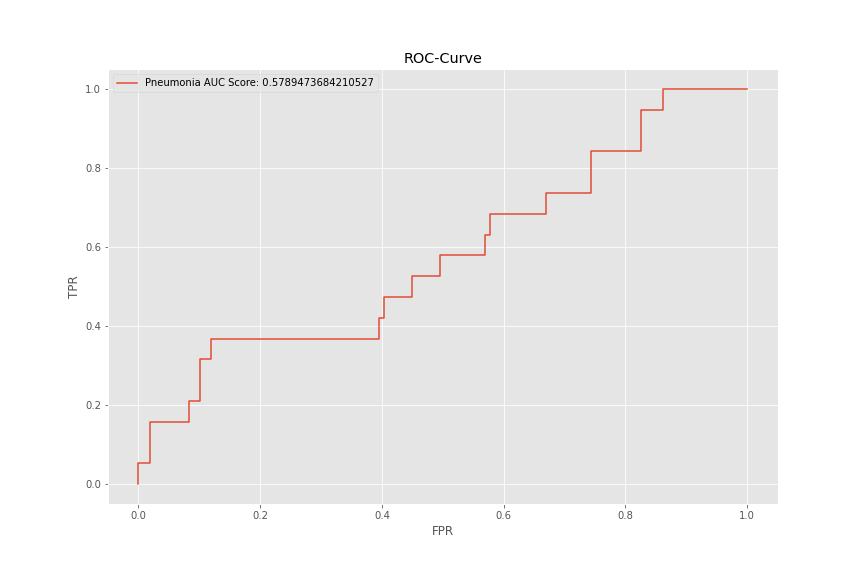
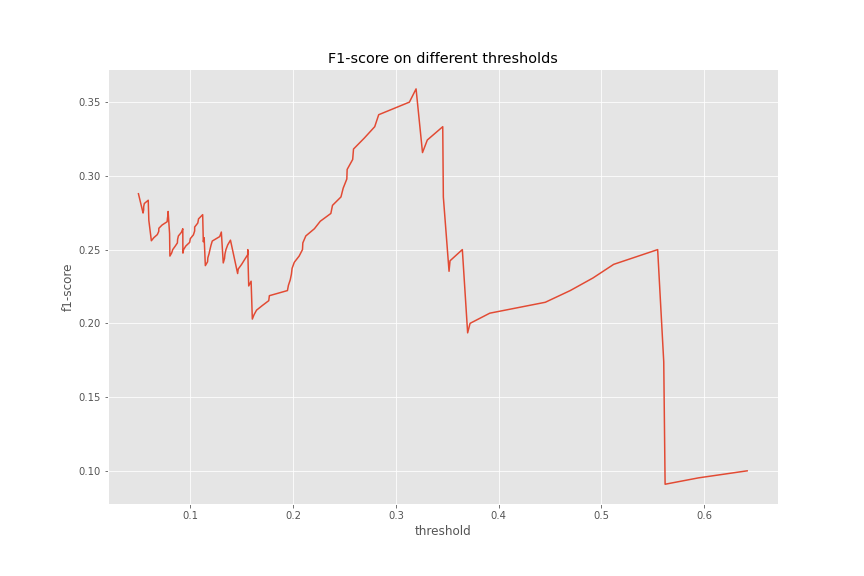

**Final Threshold and Explanation:** The threshold value which can give maximum f1 score has been selected. As evident from the graph below, for max F1 Score, the threshold value is **0.31964**

### 4. Databases
Chest X-ray exams are one of the most frequent and cost-effective medical imaging examinations available. However, clinical diagnosis of a chest X-ray can be challenging and sometimes more difficult than diagnosis via chest CT imaging. The lack of large publicly available datasets with annotations means it is still very difficult, if not impossible, to achieve clinically relevant computer-aided detection and diagnosis (CAD) in real world medical sites with chest X-rays.

This NIH Chest X-ray Dataset is comprised of 112,120 X-ray images with disease labels from 30,805 unique patients. The original radiology reports are not publicly available but you can find more details on the labeling process [here](https://arxiv.org/abs/1705.02315).The CSV file has following columns:
- Image Index: File name
- Finding Labels: Disease type (Class label)
- Follow-up #
- Patient ID
- Patient Age
- Patient Gender
- View Position: X-ray orientation
- OriginalImageWidth
- OriginalImageHeight
- OriginalImagePixelSpacing_x
- OriginalImagePixelSpacing_y

As seen in the figure below, The general dataset seems to have most patients in the age range 40-60 years. But for pneumonia-only patients, the age distribution seems to follow more of uniform distribution in the age range 20-60 years. This suggests that pneumonia is equally likely to occur in individuals between 20-60 years. The gender distribution is same for general dataset and for pneumonia-only dataset. There are more men than women. The ideal dataset should have equal number of men and women. The data for more women needs to be collected. To train an unbiased model, the training dataset should contain an equal distribution of pneumonia and non-pneumonia cases.
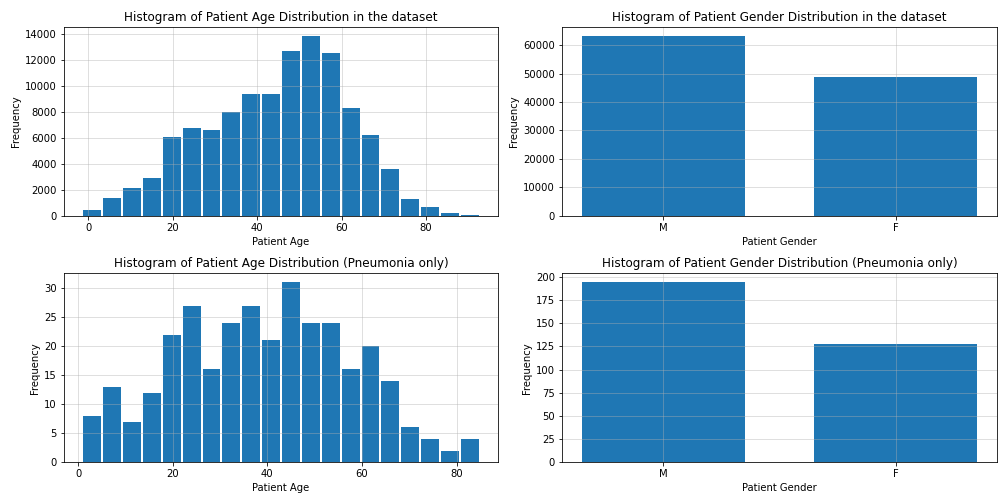

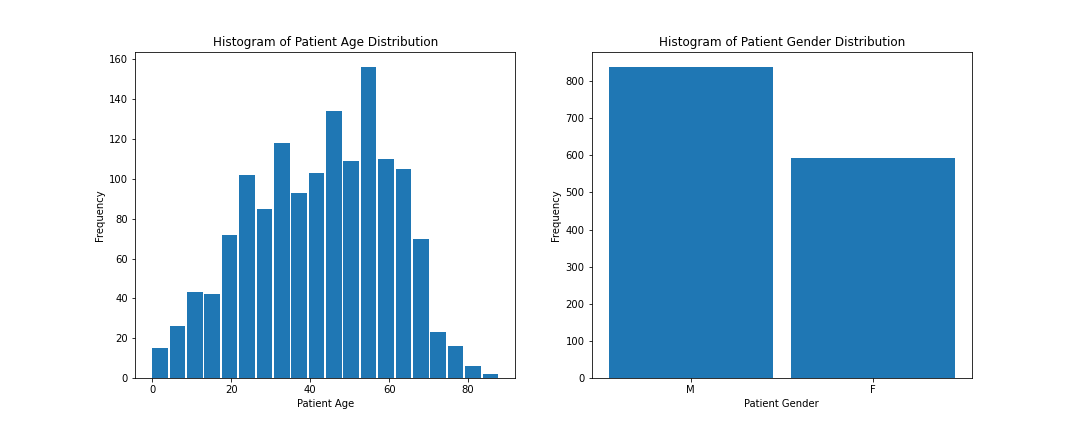

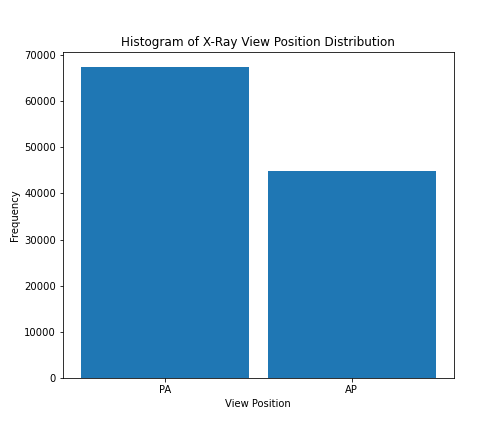

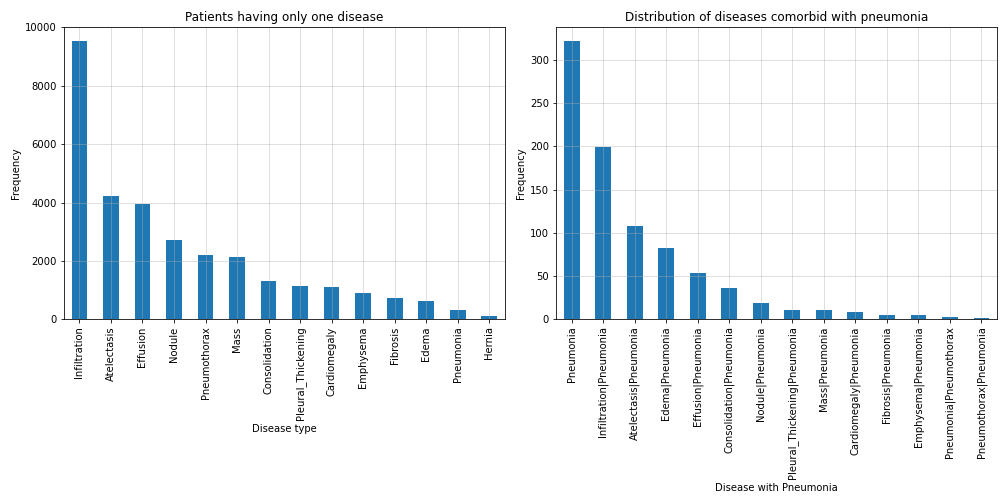

Below it the distribution of pixel intensity of patients with and without pneumonia. It is difficult to tell from intensity distribution as other diseases interfere with pixel intensity distribution. So it is difficult see from intensity distribution if patient has pneumonia or other disease or non. Moreover, intensity distribution of only-pneumonia patients has two peaks compared to just one peak in healthy patients. So they can be identified comparatively with ease.

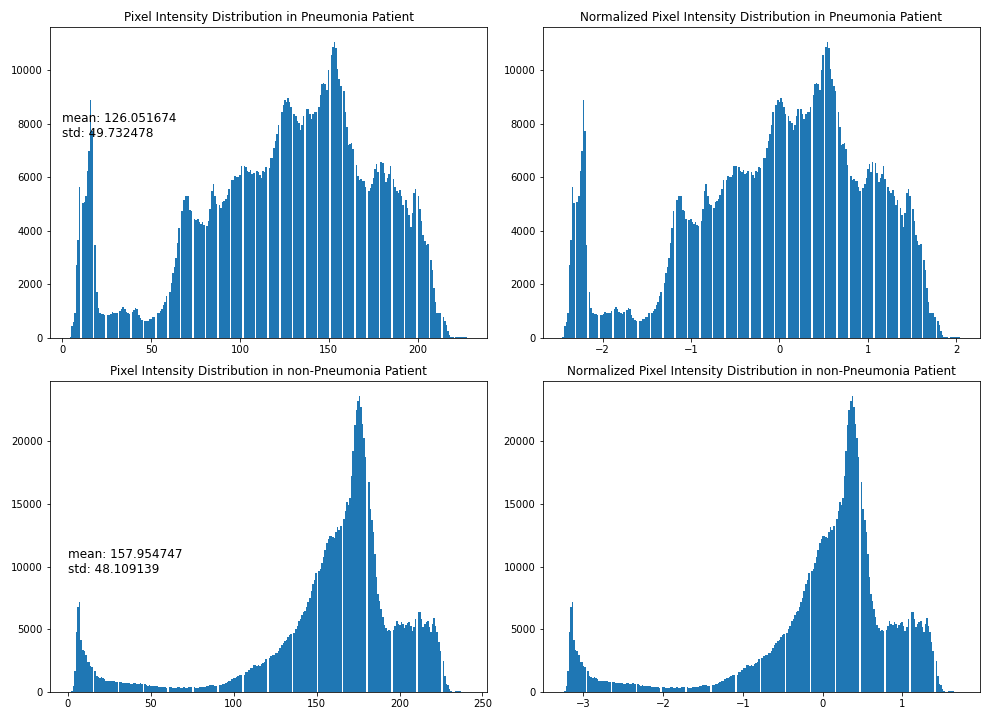

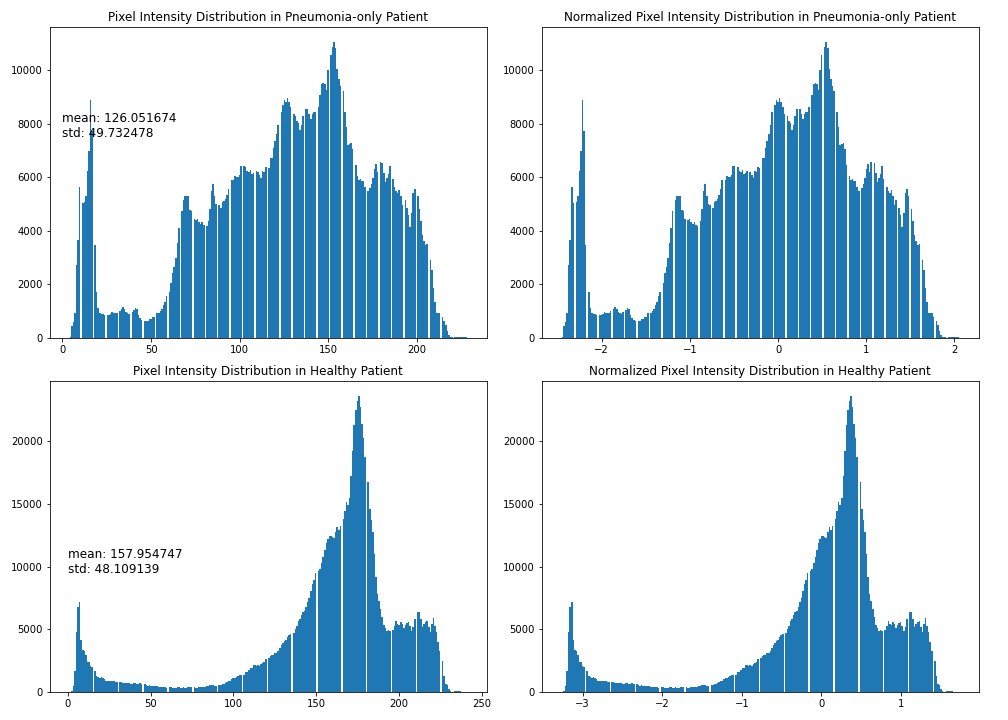


**Description of Training Dataset:**  The training data has 2288 chest-xray images. These are evenly distributed to have 50% pneumonia cases and 50% non-pneumonia cases.

**Description of Validation Dataset:** The training data has 1430 chest-xray images. These are distributed to have 20% pneumonia cases and 80% non-pneumonia cases to be a representation of real-world scenario.

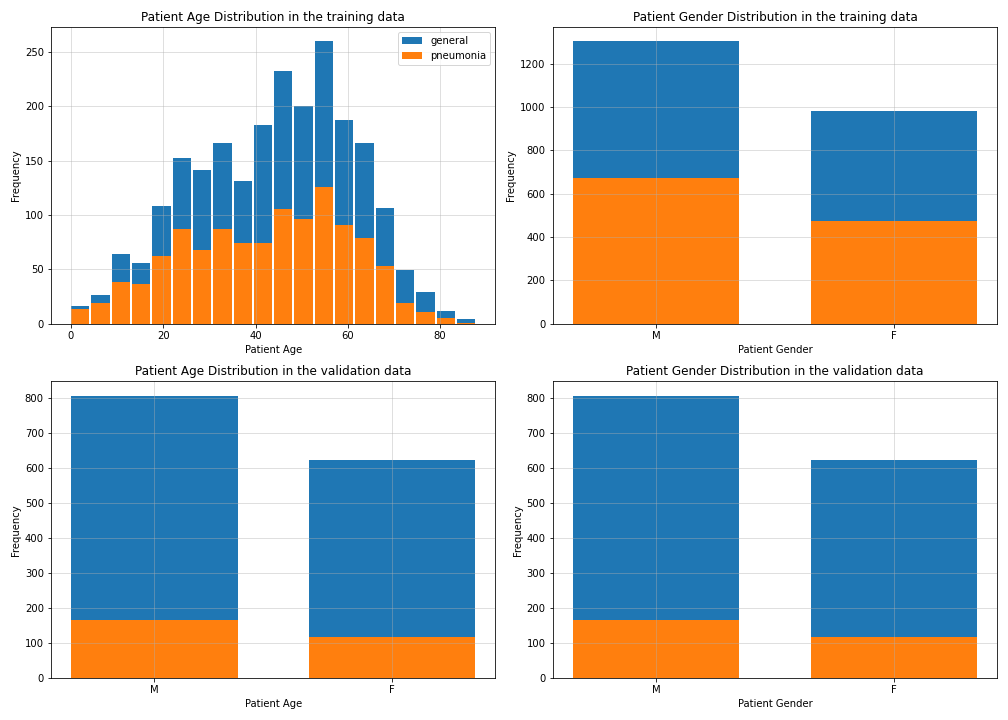
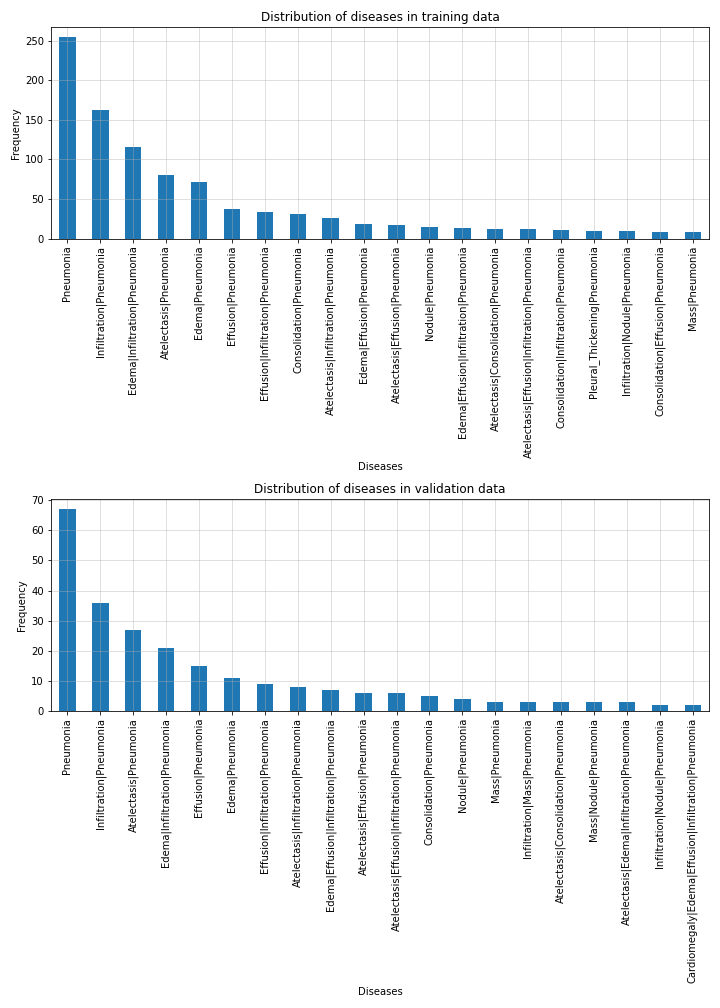


### 5. Ground Truth
To create these ground thruth, the authors used Natural Language Processing to text-mine disease classifications from the associated radiological reports. The labels are expected to be >90% accurate and suitable for weakly-supervised learning.

### 6. FDA Validation Plan

**Patient Population Description for FDA Validation Dataset:** The FDA Validation Dataset contains patients(both male and female) in age-range of 1-120 years. It includes 20% pneumonia cases and 80% non-pneumonia cases. Further each patient have multiple follow-ups. The data should be collected as DICOM file with following properties:
1. BodyPartExamined should be Chest as the algorihm is trained only on chest x-ray images
2. Image view angle must be either AP or PA.
3. Images should be X-ray images as the algorithm is trained on X-Ray images only. Therefore, image modality should be "DX"

**Ground Truth Acquisition Methodology:** The image labels were extracted using NLP algorithms. The accuracy of the labels can be estimated to be >90%. A better method for labeling could be to use silver standard approach. So, several radiologists can label the collected data with class label (Pneumonia or Healthy (non-pneumonia)). The experience of the radiologist could also be taken into account to weigh their labels.

**Algorithm Performance Standard:** The algorithm performance has been validated using F1-score. The F1 score combines both precision and recall. F1 score allows us to better measure a test’s accuracy when there are class imbalances. We got an F1-score of **0.59** which is better than radiologist average F1-score of 0.387 as mentioned in this [paper](https://arxiv.org/pdf/1711.05225.pdf)
